In [2]:
import numpy as np
import scipy
import scipy.io
from random import shuffle

In [49]:
def s(data):
    return 1 / (1 + np.exp(data))

def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

x = np.array([[0,3,1],[1,3,1],[0,1,1],[1,1,1]])
y = np.array([1,1,0,0])
w = np.array([-2,1,0])
result = [0,0,0,0]
for i in range(4):
    result[i] = float(truncate(s(np.dot(x[i], w)), 4))
print(result)

w = getNewtonUpdate(w, x, y, 0.07, 1)
print(w)

result = [0,0,0,0]
for i in range(4):
    result[i] = float(truncate(s(np.dot(x[i], w)), 4))
print(result)

w = getNewtonUpdate(w, x, y, 0.07, 1)
print(w)

[0.0474, 0.2689, 0.2689, 0.731]
[ 56.00745874 -35.1676604   34.26826978]
[1.0, 0.9999, 0.7108, 0.0]
[  4.17581337e-05   1.94001909e+00   1.93993557e+00]


In [4]:
wineTrain = []
wineTrainLabels = []

wine = scipy.io.loadmat("./data.mat")

print(wine)

wineTrain = wine['X']
wineTrainLabels = wine['y']

print("-------------")

print(wineTrain)
print(wineTrainLabels)

#np.random.shuffle(mnist["trainX"])

{'description': array(['fixed acidity       ', 'volatile acidity    ',
       'citric acid         ', 'residual sugar      ',
       'chlorides           ', 'free sulfur dioxide ',
       'total sulfur dioxide', 'density             ',
       'pH                  ', 'sulphates           ',
       'alcohol             ', 'quality             '], 
      dtype='<U20'), '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Feb 26 19:25:34 2017', 'X': array([[  5.8  ,   0.555,   0.26 , ...,   0.46 ,   9.1  ,   0.5  ],
       [  6.3  ,   0.36 ,   0.19 , ...,   0.52 ,  12.7  ,   0.6  ],
       [  6.4  ,   0.21 ,   0.5  , ...,   0.43 ,   8.8  ,   0.5  ],
       ..., 
       [  7.3  ,   0.2  ,   0.37 , ...,   0.49 ,  10.9  ,   0.6  ],
       [  8.5  ,   0.25 ,   0.27 , ...,   0.33 ,  12.   ,   0.6  ],
       [  6.6  ,   0.36 ,   0.21 , ...,   0.41 ,   9.9  ,   0.6  ]]), '__version__': '1.0', 'y': array([[ 0.],
       [ 1.],
       [ 0.],
       ..., 
       [ 0

In [34]:
def s(data):
    return 1 / (1 + np.exp(data))

print(s(2.718))

print(np.dot(np.array([1,2,3,4]), 3))

0.0619195355429
[ 3  6  9 12]


In [35]:
def f(x):
    return x*3

f = np.vectorize(f)  # or use a different name if you want to keep the original f

result_array = f(np.array([[1,2,3,4],[5,6,7,8]]))  # if A is your Numpy array
print(result_array)

[[ 3  6  9 12]
 [15 18 21 24]]


In [36]:
#x is a vector, w is the current weights guess, y is the labels set, 
#regParam is lambda, the regularization penalty multiplier
def firstGradient(w, x, y, regParam):
    firstTerm = np.dot(w, 2*regParam)
    
    xw = np.dot(x, w)
    s_vec = np.vectorize(s)
    sxw = s_vec(xw)
    ysxw = np.subtract(y, sxw)
    
    secondTerm = np.dot(np.transpose(x), ysxw)
    
    return np.subtract(firstTerm, secondTerm)

In [84]:
def randomGradient(w, x, y, regParam, index):
    xw = np.dot(x[index], w)
    s_vec = np.vectorize(s)
    sxw = s_vec(xw)
    ysxw = np.subtract(y[index], sxw)
    
    return np.dot(ysxw, x[index])

In [45]:
def secondGradient(w, x, regParam):
    firstTerm = np.dot(np.identity(len(w)), 2 * regParam)
    
    xw = np.dot(x, w)
    s_vec = np.vectorize(s)
    sxw = s_vec(xw)
    
    def one_minus(x):
        return 1 - s(x)
    
    one_minus_vec = np.vectorize(one_minus)
    sxwC = one_minus_vec(xw)
    
    omega = np.zeros((len(x), len(x)))
    
    for i in range(len(x)):
        omega[i][i] = sxw[i] * sxwC[i]
    
    secondTerm = np.dot(np.transpose(x), np.dot(omega, x))
    
    #print(firstTerm.shape)
    #print(np.transpose(x).shape)
    #print(omega.shape)
    #print(x.shape)
    
    return np.subtract(firstTerm, secondTerm)
    

In [38]:
def getNewtonUpdate(w, x, y, regParam, alpha):
    invSecondGrad = np.linalg.inv(secondGradient(w, x, regParam))
    firstGrad = firstGradient(w, x, y, regParam)
    updateTerm = np.dot(np.dot(invSecondGrad, alpha), firstGrad)
    return np.subtract(w, updateTerm)

In [66]:
def getGradientUpdate(w, x, y, regParam, alpha):
    firstGrad = firstGradient(w, x, y, regParam)
    updateTerm = np.dot(firstGrad, alpha)
    return np.subtract(w, updateTerm)

def getStochasticGradientUpdate(w, x, y, regParam, alpha):
    firstGrad = randomGradient(w, x, y, regParam, 0)
    updateTerm = np.dot(firstGrad, alpha)
    return np.subtract(w, updateTerm)

In [40]:
def calculateCostFromWeight(w, x, y, regParam):
    prediction = np.dot(x, w)
    error = np.subtract(y, prediction)
    sq_error = np.dot(np.transpose(error), error)
    
    w_sq = np.dot(np.transpose(w), w)
    regPenalty = np.dot(w_sq, regParam)
    
    print(sq_error)
    print(regPenalty)
    
    return sq_error

In [41]:
def classifyTrain(w, x, y):
    numClassify = 0
    prediction = np.dot(x, w)
    for i in range(len(x)):
        #if i < 10:
            #print(prediction[i])
            #print(y[i])
            #print("------")
        if prediction[i] < 0 and y[i] == 1:
            numClassify += 1
        if prediction[i] > 0 and y[i] == 0:
            numClassify += 1
    accuracy = str(numClassify / float(len(x)))
    print("Accuracy: " + accuracy)
    return accuracy

In [42]:
def classifyPredict(w, x):
    prediction = np.dot(x, w)
    result = []
    for i in range(len(x)):
        if prediction[i] < 0:
            result.append([i, 1])
        else:
            result.append([i, 0])
    temp = np.asarray(result)
    np.savetxt("submission.csv", temp, fmt="%i,%i", delimiter=",", header="Id,Category")

In [82]:
weightsGuess = np.zeros((12,1))

alpha = 0.1
regParam = 1

normal_log_reg_acc = []

for i in range(10):
    weightsGuess = getNewtonUpdate(weightsGuess, wineTrain, wineTrainLabels, regParam, alpha)
    #cost = calculateCostFromWeight(weightsGuess, wineTrain, wineTrainLabels, regParam)
    #print(cost)
    
    #print(weightsGuess)
    #if i % 10 == 0:
    acc = classifyTrain(weightsGuess, wineTrain, wineTrainLabels)
    normal_log_reg_acc.append(1 - float(acc))

classifyPredict(weightsGuess, wine["X_test"])

Accuracy: 0.8568333333333333
Accuracy: 0.8751666666666666
Accuracy: 0.8976666666666666
Accuracy: 0.9158333333333334
Accuracy: 0.9286666666666666
Accuracy: 0.9385
Accuracy: 0.9483333333333334
Accuracy: 0.9545
Accuracy: 0.9591666666666666
Accuracy: 0.9628333333333333


In [73]:
weightsGuess = np.zeros((12,1))

alpha = 0.1
regParam = 1

special_log_reg_acc = []

for i in range(10):
    weightsGuess = getNewtonUpdate(weightsGuess, wineTrain, wineTrainLabels, regParam, alpha/float(i + 1))
    cost = calculateCostFromWeight(weightsGuess, wineTrain, wineTrainLabels, regParam)
    #print(cost)
    
    #print(weightsGuess)
    #if i % 10 == 0:
    acc = classifyTrain(weightsGuess, wineTrain, wineTrainLabels)
    special_log_reg_acc.append(1 - float(acc))

classifyPredict(weightsGuess, wine["X_test"])

[[ 2076.42669977]]
[[ 11.69669147]]
Accuracy: 0.8568333333333333
[[ 2527.13897614]]
[[ 21.54427923]]
Accuracy: 0.87
[[ 2866.91583087]]
[[ 27.84126769]]
Accuracy: 0.877
[[ 3139.92370457]]
[[ 32.23264719]]
Accuracy: 0.884
[[ 3368.84090753]]
[[ 35.50629752]]
Accuracy: 0.8891666666666667
[[ 3566.45990945]]
[[ 38.06388943]]
Accuracy: 0.8923333333333333
[[ 3740.67088867]]
[[ 40.13142896]]
Accuracy: 0.8958333333333334
[[ 3896.68311564]]
[[ 41.84652548]]
Accuracy: 0.8986666666666666
[[ 4038.11940629]]
[[ 43.29824939]]
Accuracy: 0.9
[[ 4167.60382092]]
[[ 44.54709442]]
Accuracy: 0.9021666666666667


In [52]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

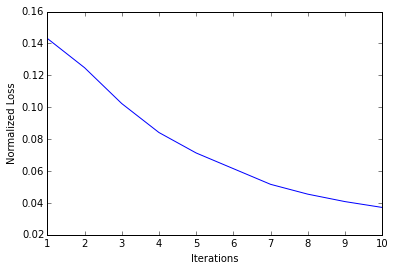

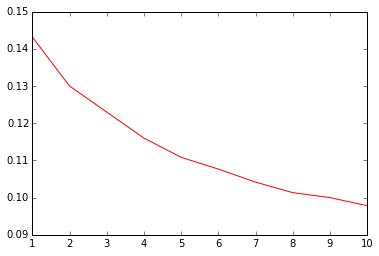

In [63]:
xData = [1,2,3,4,5,6,7,8,9,10]

plt.plot(xData, normal_log_reg_acc, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Normalized Loss')
plt.show()

plt.plot(xData, special_log_reg_acc, 'r-')

plt.show()